<a href="https://colab.research.google.com/github/irenesubin/school_prj/blob/main/Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit

In [ ]:
!pip install pylatexenc

     |████████████████████████████████| 162 kB 5.3 MB/s 
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136835 sha256=c470c06397918dd77617ca49670a71dc2ef98674a24a5314588feb703af68a1a
  Stored in directory: /root/.cache/pip/wheels/f1/8a/f5/33ee79d4473eb201b519fa40f989b842e373237395a3421f52
Successfully built pylatexenc


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *


In [ ]:
q = QuantumRegister(2, 'q')
c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(q, c)

circuit.h(q[0]) #q0번 레지스터를 중첩 상태로 만들어줌
circuit.cx(q[0], q[1]) #cnot 게이트

circuit.measure(q, c) # 계산
circuit.draw() # 그림으로 보여줌

# 하다마다 게이트 중첩 0과1 확률을 보여주는 모듈
# 51%으로 1이면 cnot게이트 작동

┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1

result {'11': 502, '00': 522}


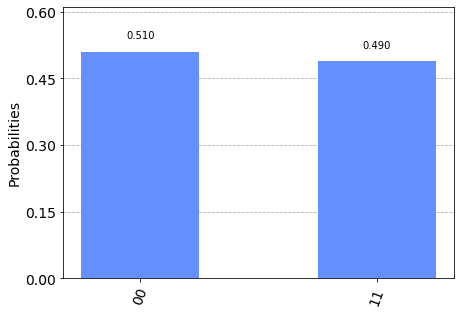

In [ ]:
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, backend = simulator, shots = 1024)
result = job.result()

counts = result.get_counts(circuit)
print("result",counts)

from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)

In [ ]:
q = QuantumRegister(10, 'q')
c = ClassicalRegister(10, 'c')
circuit = QuantumCircuit(q, c)

#q1:a0, q2:b0, q3:c1, q4:a1, q5:b1, q6:c2
circuit.ccx(q[1],q[2],q[3])
circuit.cx(q[1], q[2]) #cnot 게이트
circuit.ccx(q[0],q[2],q[3])

circuit.measure(q, c) # 계산
circuit.draw() # 그림으로 보여줌

┌─┐      
 q_0: ────────────■──────────────┤M├──────
                  │           ┌─┐└╥┘      
 q_1: ──■────■────┼───────────┤M├─╫───────
        │  ┌─┴─┐  │           └╥┘ ║ ┌─┐   
 q_2: ──■──┤ X ├──■────────────╫──╫─┤M├───
      ┌─┴─┐└───┘┌─┴─┐          ║  ║ └╥┘┌─┐
 q_3: ┤ X ├─────┤ X ├──────────╫──╫──╫─┤M├
      └┬─┬┘     └───┘          ║  ║  ║ └╥┘
 q_4: ─┤M├─────────────────────╫──╫──╫──╫─
       └╥┘  ┌─┐                ║  ║  ║  ║ 
 q_5: ──╫───┤M├────────────────╫──╫──╫──╫─
        ║   └╥┘  ┌─┐           ║  ║  ║  ║ 
 q_6: ──╫────╫───┤M├───────────╫──╫──╫──╫─
        ║    ║   └╥┘ ┌─┐       ║  ║  ║  ║ 
 q_7: ──╫────╫────╫──┤M├───────╫──╫──╫──╫─
        ║    ║    ║  └╥┘┌─┐    ║  ║  ║  ║ 
 q_8: ──╫────╫────╫───╫─┤M├────╫──╫──╫──╫─
        ║    ║    ║   ║ └╥┘┌─┐ ║  ║  ║  ║ 
 q_9: ──╫────╫────╫───╫──╫─┤M├─╫──╫──╫──╫─
        ║    ║    ║   ║  ║ └╥┘ ║  ║  ║  ║ 
c: 10/══╩════╩════╩═══╩══╩══╩══╩══╩══╩══╩═
        4    5    6   7  8  9  1  0  2  3

In [ ]:
!pip install pennylane
!pip install pennylane pennylane-cirq
!pip install qiskit
!pip install qiskit ipywidgets
!pip install tensorflow
!pip install numpy
!pip install torch
!pip install torchvision

In [ ]:
!pip install tensorflow --upgrade
!pip install keras --upgrade

In [ ]:
!pip show tensorflow
!pip show keras

In [ ]:
!pip install --upgrade pennylane

In [ ]:
!pip list

In [ ]:
import pennylane as qml
from pennylane import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras.datasets import mnist
from keras.layers import Layer, Conv2D, AveragePooling2D, Flatten, Dense, Lambda
import torch as tc
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])
train_dataset = datasets.EMNIST(root='.', split='letters', train=True, transform=transform, download=True)


In [ ]:
n_qubits = 4
n_filters = 4
n_layers = 2
batch_size = 32

dev = qml.device("default.qubit", wires=n_qubits)


In [ ]:
class QuantumConvolutionLayer(Layer):
    def __init__(self, n_filters, n_layers, **kwargs):
        super().__init__(**kwargs)
        self.n_filters = n_filters
        self.n_layers = n_layers
        self.conv_weights = self.add_weight(
            shape=(n_filters, n_qubits, n_qubits), initializer="normal", trainable=True
        )

        @qml.qnode(dev)
        def quantum_convolution(inputs, weights):
          inputs = tf.zeros(shape=(batch_size, n_qubits))
          qml.templates.AngleEmbedding(inputs, wires=list(range(n_qubits)))
          qml.templates.BasicEntanglerLayers(weights, wires=list(range(n_qubits)))
          return [qml.expval(qml.PauliZ(wires=i)) for i in range(n_qubits)]

    def call(self, inputs):
        outputs = []
        for i in range(self.n_filters):
            weight = self.conv_weights[i]
            output = self.quantum_convolution(inputs, weight)
            outputs.append(output)
        return tf.stack(outputs, axis=-1)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'n_filters': self.n_filters,
            'n_layers': self.n_layers
        })
        return config


In [ ]:
quantum_model = keras.Sequential()
quantum_model.add(tf.keras.layers.Input(shape=(n_qubits,), batch_size=batch_size))
quantum_model.add(QuantumConvolutionLayer(n_filters, n_layers))
quantum_model.add(Flatten())
quantum_model.add(Dense(units=120, activation='relu'))
quantum_model.add(Dense(units=84, activation='relu'))
quantum_model.add(Dense(units=10, activation='softmax'))


AttributeError: ignored

In [ ]:
quantum_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

x_train = train_dataset.data.numpy()
y_train = train_dataset.targets.numpy()

quantum_model.fit(x_train, y_train, epochs=10, batch_size=batch_size)